# Time Series Forecasting For A Bigger Dataset

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Loading Dataset

In [6]:
df_triain = pd.read_csv("../food_delivery_dataset/train.csv")

df_triain['Order_Date'] = pd.to_datetime(df_triain['Order_Date'])

date_counts = df_triain.groupby('Order_Date').size().reset_index(name='count')

print(date_counts)

   Order_Date  count
0  2022-02-11    970
1  2022-02-12    864
2  2022-02-13    957
3  2022-02-14    851
4  2022-02-15    945
5  2022-02-16    861
6  2022-02-17    939
7  2022-02-18    855
8  2022-03-01   1140
9  2022-03-02   1012
10 2022-03-03   1150
11 2022-03-04    981
12 2022-03-05   1154
13 2022-03-06    986
14 2022-03-07   1153
15 2022-03-08    964
16 2022-03-09   1159
17 2022-03-10    996
18 2022-03-11   1149
19 2022-03-12    964
20 2022-03-13   1169
21 2022-03-14    974
22 2022-03-15   1192
23 2022-03-16    995
24 2022-03-17   1134
25 2022-03-18    968
26 2022-03-19   1150
27 2022-03-20    994
28 2022-03-21   1149
29 2022-03-23    964
30 2022-03-24   1162
31 2022-03-25    975
32 2022-03-26   1166
33 2022-03-27    965
34 2022-03-28   1139
35 2022-03-29    977
36 2022-03-30   1141
37 2022-03-31    967
38 2022-04-01   1133
39 2022-04-02    992
40 2022-04-03   1178
41 2022-04-04    941
42 2022-04-05   1157
43 2022-04-06    961


/var/folders/2t/gftqwtk579jcc7_0379k_f900000gn/T/ipykernel_39335/997718512.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_triain['Order_Date'] = pd.to_datetime(df_triain['Order_Date'])


In [2]:
df = pd.read_csv("../food_delivery_dataset/olist_orders_dataset.csv")
cols = ['order_id','customer_id','order_status','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
df.drop(cols,axis=1,inplace=True)
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['date'] = df['order_purchase_timestamp']
df.head()

,order_purchase_timestamp,date
0,2017-10-02 10:56:33,2017-10-02 10:56:33
1,2018-07-24 20:41:37,2018-07-24 20:41:37
2,2018-08-08 08:38:49,2018-08-08 08:38:49
3,2017-11-18 19:28:06,2017-11-18 19:28:06
4,2018-02-13 21:18:39,2018-02-13 21:18:39


In [36]:
df.isnull().sum()

order_purchase_timestamp    0
date                        0
dtype: int64

In [3]:
df1 = pd.read_csv('../food_delivery_dataset/data3.csv')
df1.columns = ['orderId','timestamp','Count']
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1.tail(20)

,orderId,timestamp,Count
710,971,2018-12-12,35
711,606,2018-12-13,72
712,134,2018-12-14,214
713,9,2018-12-15,340
714,315,2018-12-16,135
715,745,2018-12-17,55
716,917,2018-12-18,40
717,398,2018-12-19,112
718,470,2018-12-20,99
719,163,2018-12-21,200


In [4]:
df1 = df1.set_index('timestamp')
df1.tail()

,orderId,Count
timestamp,,
2018-12-27,227,165
2018-12-28,387,116
2018-12-29,210,173
2018-12-30,292,142
2018-12-31,20,314


In [5]:
y = df1['Count']
y['2017':]

timestamp
2017-01-01    124
2017-01-02     38
2017-01-03     21
2017-01-04    231
2017-01-05    129
             ... 
2018-12-27    165
2018-12-28    116
2018-12-29    173
2018-12-30    142
2018-12-31    314
Name: Count, Length: 730, dtype: int64

## Plotting the Daily Order Count

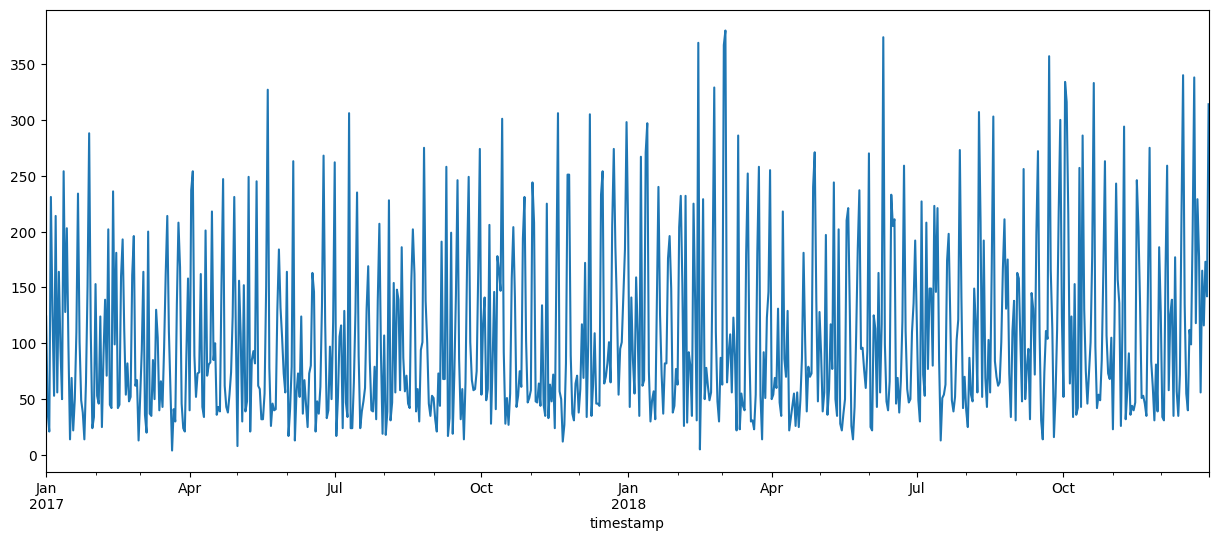

In [41]:
y.plot(figsize=(15,6))
plt.show()

## We compute the Trend, Seaonality and Residual (Noise) of the current data.

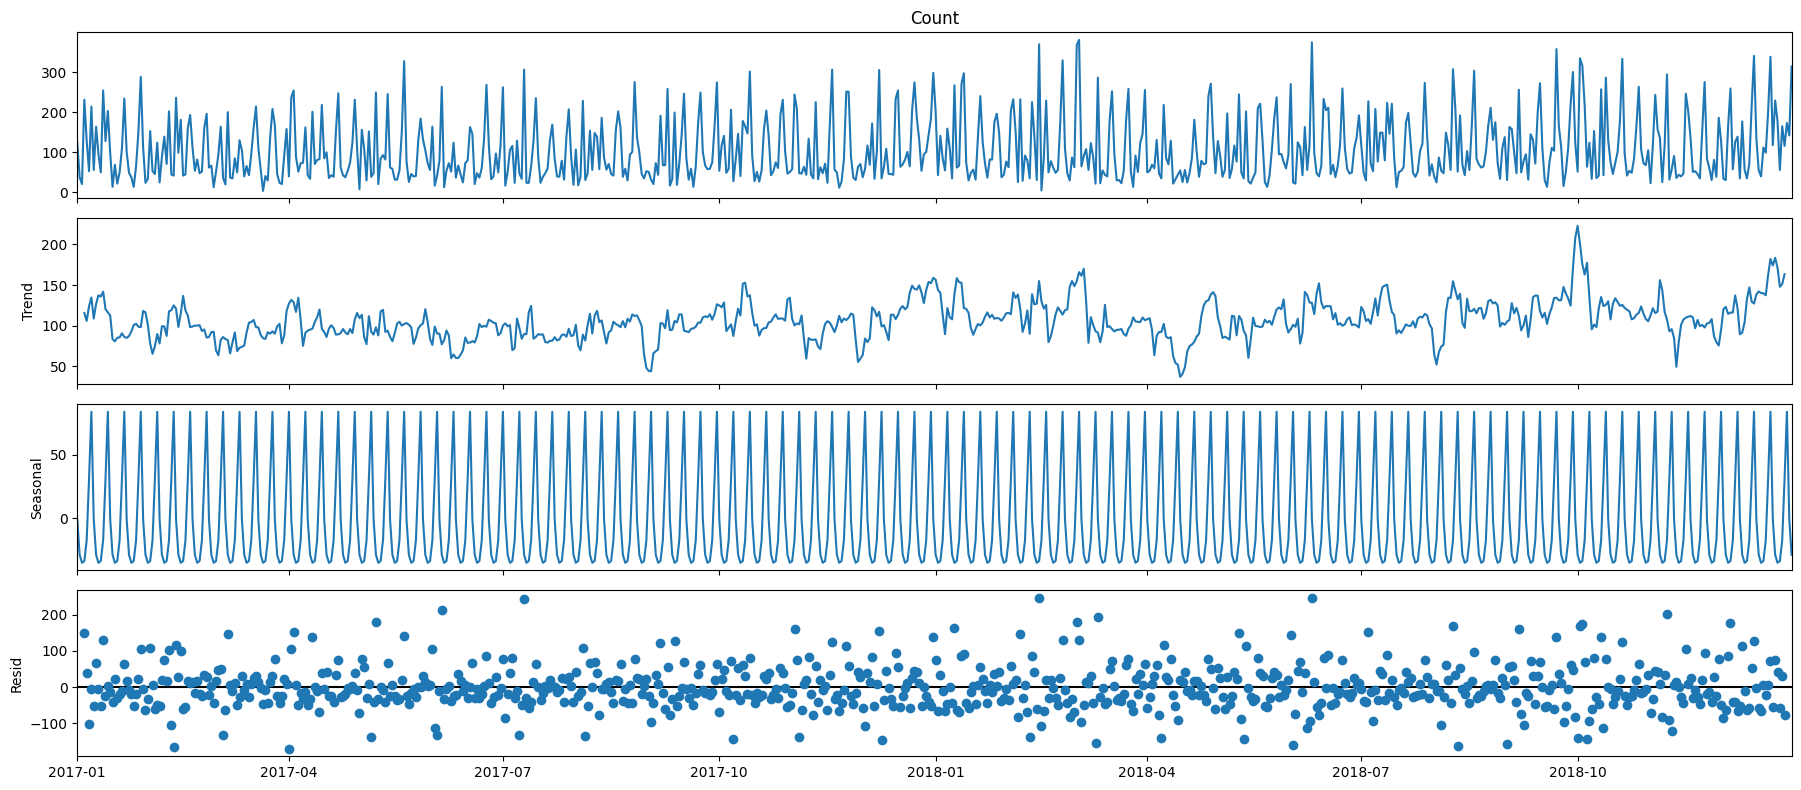

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [43]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [45]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61851D+00    |proj g|=  7.71799D-02

At iterate    5    f=  5.60800D+00    |proj g|=  9.00686D-02

At iterate   10    f=  5.60095D+00    |proj g|=  2.84891D-03

At iterate   15    f=  5.60014D+00    |proj g|=  2.80912D-02

At iterate   20    f=  5.56566D+00    |proj g|=  1.22589D-01

At iterate   25    f=  5.56124D+00    |proj g|=  1.30559D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     37      1     0     0   

## Plotting Different Diagnosis For Forecasting

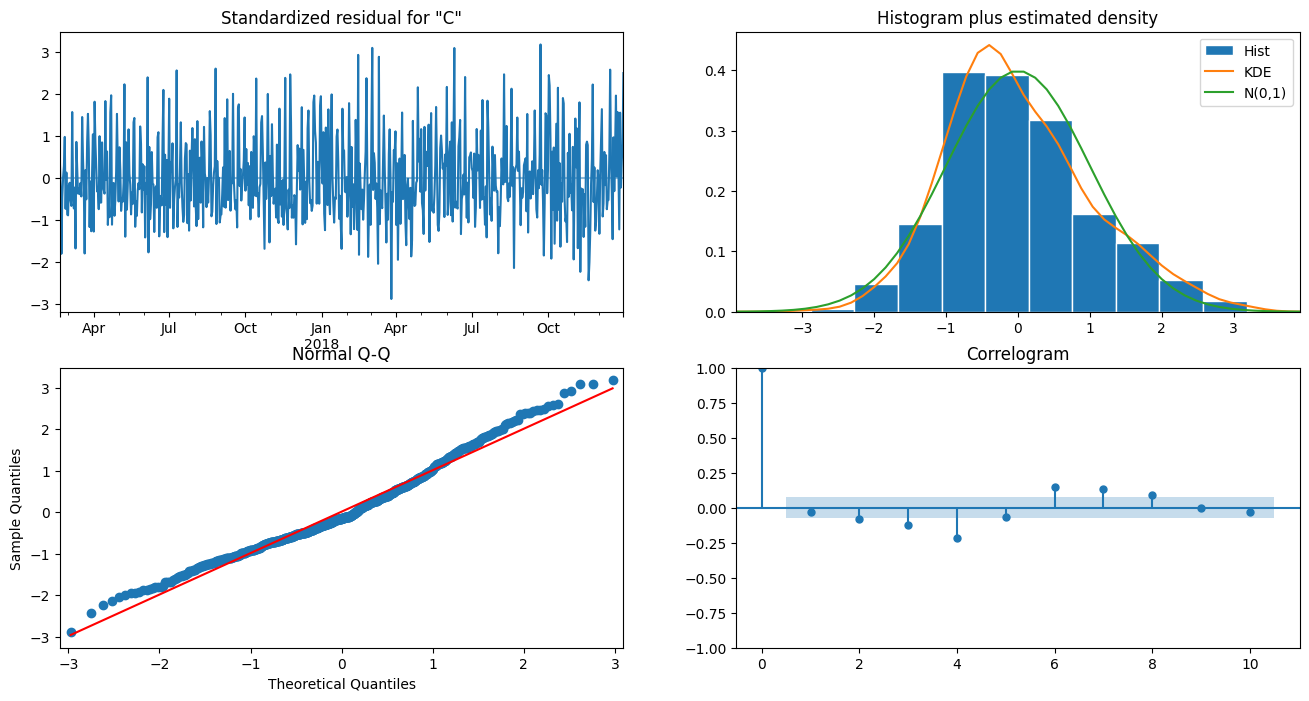

In [46]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## We try to plot the graph using the values obtained using SARIMA Model

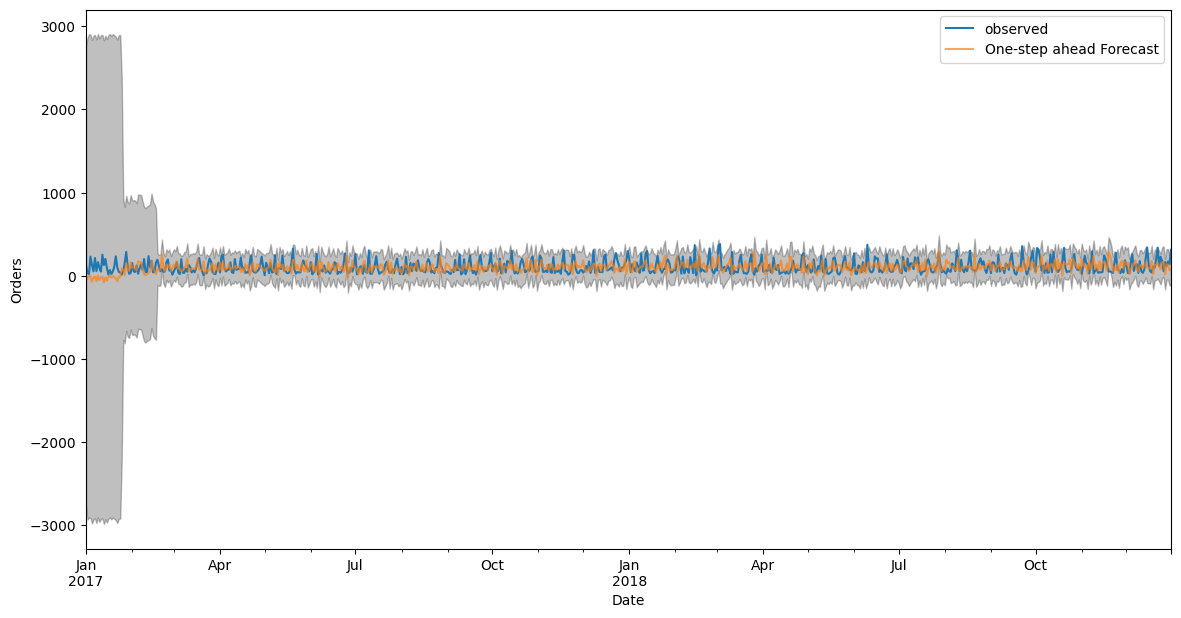

In [47]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Orders')
plt.legend()
plt.show()

### Here, since the number of data points is huge, we get a more plausible graph when predicting the values.

## Computing the Squared Error

In [48]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 9288.75


In [49]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 96.38


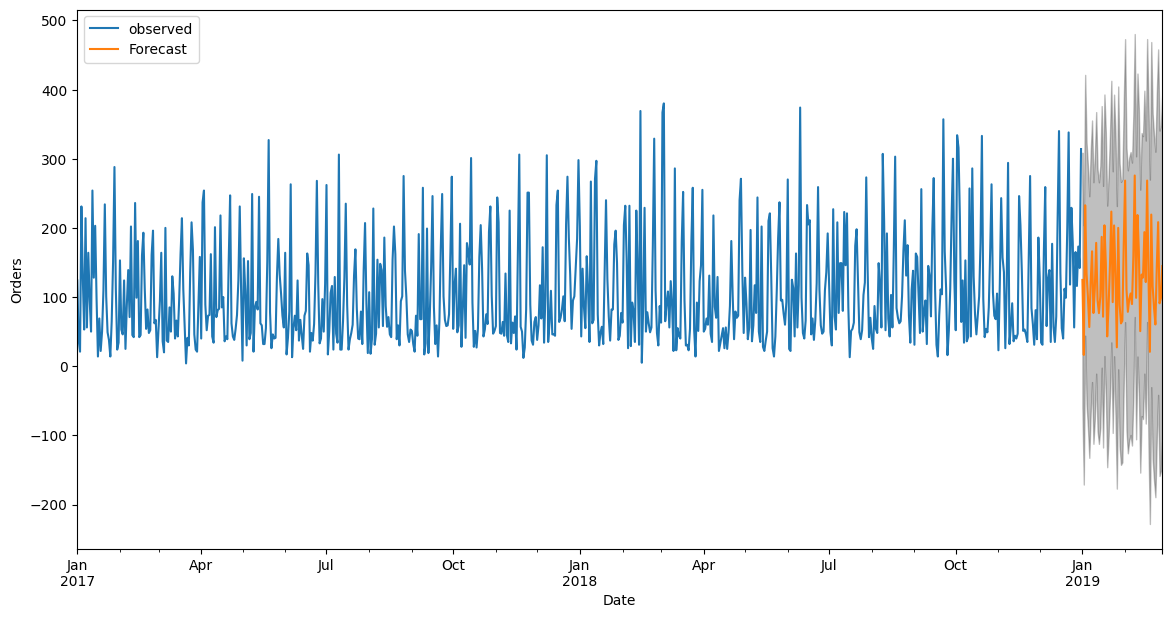

In [50]:
pred_uc = results.get_forecast(steps=59)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Orders')
plt.legend()
plt.show()

### Here, we see the orange line is the predicted value, based on the SARIMA Time Series Forecasting. The gray part is the expected noise in the data. 

### Here the predictions is uniform compared to a smaller dataset.

In [54]:
pred_uc.predicted_mean.to_csv('../food_delivery_dataset/abc.csv',index = False, header=True)

### We can extract the values form the above prediction value. This value can be fed to an application, so that the concerned organisation can take necessary action.

In [55]:
pred_uc.predicted_mean

2019-01-01    124.717859
2019-01-02     16.251489
2019-01-03    232.714261
2019-01-04    134.477453
2019-01-05    100.182027
2019-01-06     56.580006
2019-01-07    121.191987
2019-01-08    166.156955
2019-01-09     76.856444
2019-01-10    112.225858
2019-01-11    178.322048
2019-01-12     95.417908
2019-01-13     76.742520
2019-01-14    100.637279
2019-01-15    186.990528
2019-01-16     71.557686
2019-01-17    203.738412
2019-01-18    148.610483
2019-01-19     43.073988
2019-01-20     86.248305
2019-01-21    145.385349
2019-01-22    223.540349
2019-01-23     92.634765
2019-01-24    203.514866
2019-01-25    133.111396
2019-01-26     27.269647
2019-01-27    199.971828
2019-01-28     88.945033
2019-01-29     61.875495
2019-01-30     65.642108
2019-01-31    175.733938
2019-02-01    268.322030
2019-02-02    111.026584
2019-02-03     78.595037
2019-02-04     97.032154
2019-02-05    105.162967
2019-02-06     89.822924
2019-02-07    159.031332
2019-02-08    275.736641
2019-02-09     98.851171
